0    10833
1      479
Name: Blackout, dtype: int64


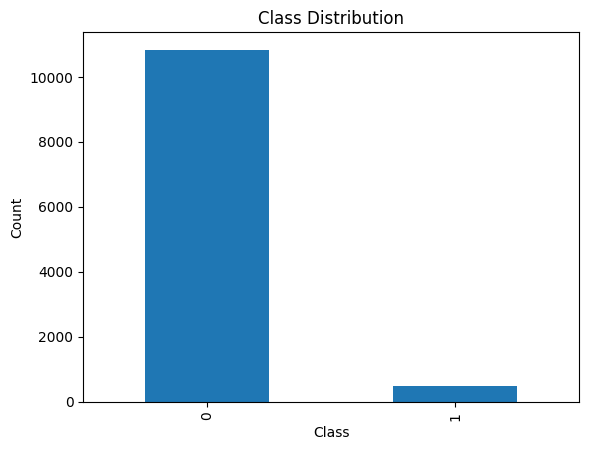

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

"""read the dataset and fillna with 0"""
def pre_process(path):
    df = pd.read_csv(path)
    df=df.fillna(0)
    return df
""" plot target class distribution """
def plot_class_distribution(data, target):
    class_counts = data[target].value_counts()
    print(class_counts)
    class_counts.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()
    
"""Based on the output, the class is very imbalance, with that, i will try couple ways to optimize the model performance"""
df=pre_process('/Users/zoehuang/Desktop/MGT6203/project_v2/Team-36/Data/Merged_Data_V3.csv')
plot_class_distribution(df,'Blackout')

In [65]:
df.columns

Index(['state_abb', 'DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN', 'Fog', 'HeavyFog',
       'Thunder', 'Sleet', 'Hail', 'Glaze', 'Dust', 'Smoke', 'DriftSnow',
       'Winds', 'Mist', 'Drizzle', 'Rain', 'FrzRain', 'Snow', 'UnknownPrec',
       'IceFog', 'State', 'Demand.Loss..MW.', 'Date.of.Restoration',
       'Event.Type', 'Region', 'Month', 'dayName', 'Weekend', 'Blackout',
       'Season'],
      dtype='object')

# Attain a sample(15%) of the non blackout dataset and concat with the blackout dataset to get a more balanced dataset


In [60]:
import random
non_blackout=df[df['Blackout']==0]
blackout = df[df['Blackout']==1]


In [61]:
non_blackout_filter=non_blackout.sample(frac=0.15)
total_df = pd.concat([non_blackout_filter,blackout]).reset_index(drop=True)
# total_df

In [62]:
total_df.describe()

,PRCP,SNOW,TMAX,TMIN,Fog,HeavyFog,Thunder,Sleet,Hail,Glaze,...,Mist,Drizzle,Rain,FrzRain,Snow,UnknownPrec,IceFog,Demand.Loss..MW.,Weekend,Blackout
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,...,2104.000000,2104.0,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,0.111269,0.047814,70.306559,50.172529,0.165399,0.013308,0.012833,0.000951,0.027567,0.001426,...,0.059886,0.0,0.065589,0.001901,0.012833,0.003327,0.003802,86.365970,0.278517,0.227662
std,0.366646,0.563913,18.640954,13.498496,0.371629,0.114617,0.112579,0.030824,0.163766,0.037743,...,0.237332,0.0,0.247622,0.043571,0.112579,0.057598,0.061560,1090.994256,0.448376,0.419423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,57.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,71.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.000000,85.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.440000,12.200000,116.000000,84.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,41788.000000,1.000000,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = total_df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

plt.show()


In [70]:
X_selected

Index(['TMAX', 'HeavyFog', 'FrzRain', 'UnknownPrec', 'Demand.Loss..MW.',
       'DriftSnow', 'Smoke', 'Fog', 'IceFog', 'Mist', 'TMIN', 'Thunder',
       'Snow', 'Rain', 'Hail', 'Dust', 'Sleet', 'PRCP', 'SNOW', 'Weekend',
       'Glaze'],
      dtype='object')

0    1625
1     479
Name: Blackout, dtype: int64


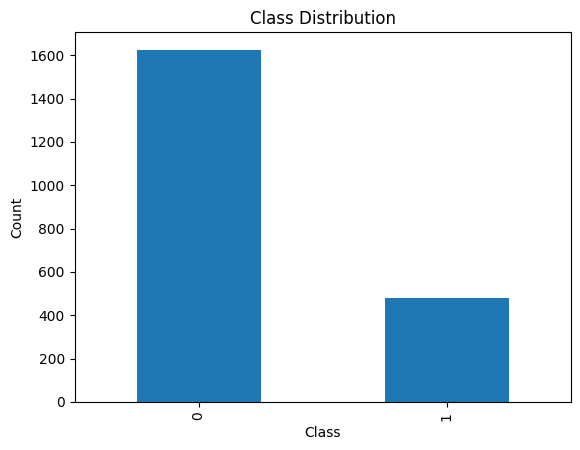

In [63]:
plot_class_distribution(total_df,'Blackout')

In [59]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import numpy as np

def perform_pca(data, numeric_columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numeric_columns])

    pca = PCA()
    X_pca = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)
    num_components_to_retain = np.argmax(cumulative_variance >= 0.95) + 1

    top_features_per_component = []
    for component_idx in range(num_components_to_retain):
        top_feature_idx = np.argsort(np.abs(pca.components_[component_idx]))[::-1][:10]
        top_features = data[numeric_columns].columns[top_feature_idx]
        top_features_per_component.extend(top_features)

    selected_features = list(set(top_features_per_component))
    return selected_features

def resample_data(X, y):
    smote = SMOTE(random_state=123)
    ros = RandomOverSampler(random_state=123)
    rus = RandomUnderSampler(random_state=123)

    X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
    X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)
    X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

    resampled_data = [
        (X_resampled_smote, y_resampled_smote, 'SMOTE'),
        (X_resampled_ros, y_resampled_ros, 'RandomOverSampler'),
        (X_resampled_rus, y_resampled_rus, 'RandomUnderSampler')
    ]

    return resampled_data

def train_classifiers(X_train, y_train, X_test, y_test):
    classifiers = [
        ('Logistic Regression', LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10], 'penalty': [None, 'l2']}),
        ('Decision Tree', DecisionTreeClassifier(), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}),
        ('Random Forest', RandomForestClassifier(max_features='sqrt'), {'n_estimators': [100, 200, 500], 'min_samples_split': [2, 5, 10]}),
        ('SVM', SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
        ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
        ('CatBoost', CatBoostClassifier(verbose=False), {'iterations': [100, 200, 500], 'learning_rate': [0.1, 0.01, 0.001]}),
        ('XGBoost', XGBClassifier(), {'n_estimators': [100, 200, 500], 'learning_rate': [0.1, 0.01, 0.001]})
    ]

    trained_classifiers = []
    predictions = []

    for X_resampled, y_resampled, resampling_type in resampled_data:
        print(f"Resampling Technique: {resampling_type}")
        print()

        for name, classifier, param_grid in classifiers:
            grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
            grid_search.fit(X_resampled, y_resampled)
            best_params = grid_search.best_params_
            classifier.fit(X_resampled, y_resampled)
            trained_classifiers.append(classifier)
            y_pred = classifier.predict(X_test)
            predictions.append(y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            print(f"{name} Best Parameters:", best_params)
            print(f"{name} Accuracy:", accuracy)
            print(f"{name} Precision:", precision)
            print(f"{name} Recall:", recall)
            print(f"{name} F1 Score:", f1)
            print()

# Assuming you have your data stored in 'df' dataframe

# Step 1: Perform PCA and determine the number of components to retain
numeric_columns = ['PRCP', 'SNOW', 'TMAX', 'TMIN', 'Fog', 'HeavyFog', 'Thunder', 'Sleet', 'Hail', 'Glaze', 'Dust',
                   'Smoke', 'DriftSnow', 'Winds', 'Mist', 'Drizzle', 'Rain', 'FrzRain', 'Snow', 'UnknownPrec',
                   'IceFog', 'Demand.Loss..MW.', 'Weekend']
selected_features = perform_pca(total_df, numeric_columns)

# Step 2: Split the data into train and test sets using the selected features
X_selected = total_df[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, total_df['Blackout'], test_size=0.2, random_state=123)

# Step 3: Resample the training data using different techniques
resampled_data = resample_data(X_train, y_train)

# # Step 4: Train the classifiers and make predictions on the test set
train_classifiers(X_train, y_train, X_test, y_test)


Resampling Technique: SMOTE



/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to co

Logistic Regression Best Parameters: {'C': 1, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.8123515439429929
Logistic Regression Precision: 0.6
Logistic Regression Recall: 0.6060606060606061
Logistic Regression F1 Score: 0.6030150753768845

Decision Tree Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Decision Tree Accuracy: 0.7933491686460807
Decision Tree Precision: 0.55
Decision Tree Recall: 0.6666666666666666
Decision Tree F1 Score: 0.6027397260273972

Random Forest Best Parameters: {'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy: 0.7980997624703088
Random Forest Precision: 0.5660377358490566
Random Forest Recall: 0.6060606060606061
Random Forest F1 Score: 0.5853658536585366

SVM Best Parameters: {'C': 10, 'kernel': 'linear'}
SVM Accuracy: 0.8456057007125891
SVM Precision: 1.0
SVM Recall: 0.3434343434343434
SVM F1 Score: 0.5112781954887218

KNN Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
KNN Accuracy: 0.6983372921615202
KNN Preci

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None wil

Logistic Regression Best Parameters: {'C': 10, 'penalty': 'l2'}
Logistic Regression Accuracy: 0.8242280285035629
Logistic Regression Precision: 0.6404494382022472
Logistic Regression Recall: 0.5757575757575758
Logistic Regression F1 Score: 0.6063829787234043

Decision Tree Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Decision Tree Accuracy: 0.7838479809976246
Decision Tree Precision: 0.5344827586206896
Decision Tree Recall: 0.6262626262626263
Decision Tree F1 Score: 0.5767441860465117

Random Forest Best Parameters: {'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy: 0.8123515439429929
Random Forest Precision: 0.6041666666666666
Random Forest Recall: 0.5858585858585859
Random Forest F1 Score: 0.5948717948717948

SVM Best Parameters: {'C': 1, 'kernel': 'linear'}
SVM Accuracy: 0.8456057007125891
SVM Precision: 1.0
SVM Recall: 0.3434343434343434
SVM F1 Score: 0.5112781954887218

KNN Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to co

Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Decision Tree Accuracy: 0.6793349168646081
Decision Tree Precision: 0.40217391304347827
Decision Tree Recall: 0.7474747474747475
Decision Tree F1 Score: 0.5229681978798586

Random Forest Best Parameters: {'min_samples_split': 10, 'n_estimators': 500}
Random Forest Accuracy: 0.7553444180522565
Random Forest Precision: 0.4857142857142857
Random Forest Recall: 0.6868686868686869
Random Forest F1 Score: 0.5690376569037656

SVM Best Parameters: {'C': 1, 'kernel': 'linear'}
SVM Accuracy: 0.8408551068883611
SVM Precision: 1.0
SVM Recall: 0.32323232323232326
SVM F1 Score: 0.4885496183206107

KNN Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
KNN Accuracy: 0.7695961995249406
KNN Precision: 0.5086206896551724
KNN Recall: 0.5959595959595959
KNN F1 Score: 0.5488372093023256

CatBoost Best Parameters: {'iterations': 200, 'learning_rate': 0.01}
CatBoost Accuracy: 0.8218527315914489
CatBoost Precision: 0.62244897959183